In [3]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

In [4]:
len(train_data)

len(test_data)


2246

In [5]:
train_data[10]


[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [6]:
word_index = reuters.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in     train_data[0]])

565248/550378 [==============================] - 0s 0us/step


In [7]:
import numpy as np 
def vectorize_sequences(sequences, dimension=10000): 
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1. 
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

In [13]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [15]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [16]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 70ms/step - loss: 2.6752 - accuracy: 0.5144 - val_loss: 1.7893 - val_accuracy: 0.6180
Epoch 2/20
16/16 [==============================] - 1s 51ms/step - loss: 1.4632 - accuracy: 0.6972 - val_loss: 1.3211 - val_accuracy: 0.7070
Epoch 3/20
16/16 [==============================] - 1s 50ms/step - loss: 1.0706 - accuracy: 0.7671 - val_loss: 1.1338 - val_accuracy: 0.7470
Epoch 4/20
16/16 [==============================] - 1s 51ms/step - loss: 0.8415 - accuracy: 0.8197 - val_loss: 1.0298 - val_accuracy: 0.7790
Epoch 5/20
16/16 [==============================] - 1s 51ms/step - loss: 0.6722 - accuracy: 0.8602 - val_loss: 0.9651 - val_accuracy: 0.7910
Epoch 6/20
16/16 [==============================] - 1s 51ms/step - loss: 0.5371 - accuracy: 0.8899 - val_loss: 0.9274 - val_accuracy: 0.8020
Epoch 7/20
16/16 [==============================] - 1s 51ms/step - loss: 0.4324 - accuracy: 0.9102 - val_loss: 0.9003 - val_accuracy: 0.8170
Epoch 8/20
16

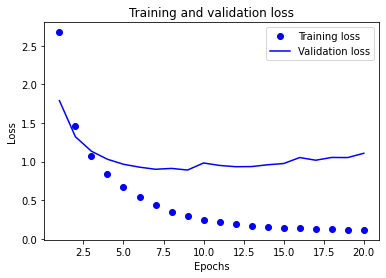

In [18]:
import matplotlib

import matplotlib.pyplot as plt

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

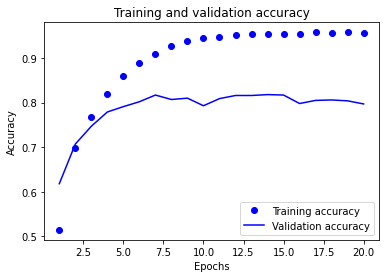

In [19]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()